<a href="https://colab.research.google.com/github/Nuttapong9911/Books-Store-DB-Project/blob/main/Hand_signs_detecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='rgb(248, 113, 113)'>Project:</font> <font color='pink'>Hand signs detecting. ✋ 🤙</font>**

เป็นโปรเจคเกี่ยวกับการทํานายภาษามือ โดยจะให้โมเดลเรียนรู้ภาษามือหรือลักษณะของมือรูปแบบ ต่างๆ ผ่านการป้อนรูปภาพที่เป็นภาษามือรูปแบบต่างๆ เพื่อให้โมเดลสามารถ ตรวจจับและจําแนก ลักษณะท่าทางของมือได้ และ โปรเจคของกลุ่มเราสามารถนาไปใช้ต่อยอดได้ในหลายๆเรื่อง ตัวอย่าง เช่น การสร้างระบบสังการอัตโนมัติทคอยรับคําสั่งจากท่าทางของเราเพื่อทําการปิดไฟห้องเมื่อจะนอน (ไม่ต้องลุกไปปัดเอง) และน่าไปสร้างเป็นแอพพลิเคชั่น ที่สามารถช่วยให้คนปกติทั่วไปสามารถคุยกับผู้ พิการทางการได้ยินได้ง่ายขึ้น

# **Import libraries**

In [ ]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader
import torch.optim as optim
import torchvision
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
from skimage import io, img_as_float

import argparse
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

## **Load Data From Kaggle**
Kaggle's Link: [hand-signs-images](https://www.kaggle.com/datasets/ash2703/handsignimages)

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ash2703/handsignimages

 56% 13.0M/23.1M [00:00<00:00, 136MB/s]
100% 23.1M/23.1M [00:00<00:00, 180MB/s]


In [ ]:
! unzip handsignimages.zip

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: Train/U/25890_U.jpg     
  inflating: Train/U/25896_U.jpg     
  inflating: Train/U/2589_U.jpg      
  inflating: Train/U/25926_U.jpg     
  inflating: Train/U/25933_U.jpg     
  inflating: Train/U/25992_U.jpg     
  inflating: Train/U/26014_U.jpg     
  inflating: Train/U/26017_U.jpg     
  inflating: Train/U/26038_U.jpg     
  inflating: Train/U/26042_U.jpg     
  inflating: Train/U/26087_U.jpg     
  inflating: Train/U/26088_U.jpg     
  inflating: Train/U/2610_U.jpg      
  inflating: Train/U/26122_U.jpg     
  inflating: Train/U/26173_U.jpg     
  inflating: Train/U/2624_U.jpg      
  inflating: Train/U/26257_U.jpg     
  inflating: Train/U/26294_U.jpg     
  inflating: Train/U/26334_U.jpg     
  inflating: Train/U/26357_U.jpg     
  inflating: Train/U/26378_U.jpg     
  inflating: Train/U/26384_U.jpg     
  inflating: Train/U/2638_U.jpg      
  inflating: Train/U/26399_U.jpg     
  inflating: Train/U/26416_U.jp

## **Find mean and sd of training data**

❌**no need to run again**

In [ ]:
mean_arr = np.array([])
sd_arr = np.array([])

for subdir, dirs, files in os.walk('/content/drive/MyDrive/dummy'):
    for file in files:
        # print (os.path.join(subdir, file))
        filepath = subdir + os.sep + file
        if filepath.endswith(".jpg"):
            image = io.imread(filepath)
            image = img_as_float(image)
            mean_arr = np.append(mean_arr, image)
            sd_arr = np.append(sd_arr, image)
            # print (filepath)


In [ ]:
print(len(mean_arr))
print(len(sd_arr))
print(np.mean(mean_arr))
print(np.std(sd_arr))
x = np.array([np.mean(mean_arr)])
print(len(x))
y = np.array([np.std(sd_arr)])
print(len(y))

# Find Dimension for use in Linear
❌No need to run

In [ ]:
model1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=3, stride=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(64, 128, kernel_size=2, stride=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    # nn.Conv2d(64, 128, kernel_size=2, stride=1),
    # nn.ReLU(),
    # nn.MaxPool2d(kernel_size=2),
    nn.Dropout(0.25),
    nn.Flatten(),
    # nn.Linear(128, 128),
)

print('Dimension for fc1: ')
model1(torch.zeros(128,1,28,28)).size()

# model2 = nn.Sequential(
#     nn.Conv2d(1, 32, kernel_size=3, stride=1),
#     nn.ReLU(),
#     nn.MaxPool2d(kernel_size=2),
#     nn.Conv2d(32, 64, kernel_size=3, stride=1),
#     nn.ReLU(),
#     nn.MaxPool2d(kernel_size=2),
#     nn.Conv2d(64, 128, kernel_size=2, stride=1),
#     nn.ReLU(),
#     nn.MaxPool2d(kernel_size=2),
#     nn.Dropout(0.25),
#     nn.Flatten(),
#     nn.Linear(512, 128), 
#     nn.ReLU(),
#     nn.Dropout(0.5),
#     nn.Linear(128, 128), 
# )

# print('Dimension for fc2: ')
# model2(torch.zeros(128,1,28,28)).size()

Dimension for fc1: 


torch.Size([128, 128])

# **Initial setting**

- <font color='yellow'>initial device setting</font>

In [ ]:
# # version 1
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 64, 3, 2)
#         self.conv2 = nn.Conv2d(64, 128, 2, 2)
#         self.dropout1 = nn.Dropout(0.25)
#         self.fc1 = nn.Linear(128, 128)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.dropout1(x)
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         output = F.log_softmax(x, dim=1)
#         return output

# version 2
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 128, 2, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(1152, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        # print(f"Start : {x.size()}")
        x = self.conv1(x)
        x = F.relu(x)
        # print(f"convo : {x.size()}")
        x = F.max_pool2d(x, 3)
        # print(f"maxpool : {x.size()}")
        x = self.conv2(x)
        x = F.relu(x)
        # print(f"convo : {x.size()}")
        x = F.max_pool2d(x, 2)
        # print(f"amxpool : {x.size()}")
        x = self.dropout1(x)
        # print(f"dropout : {x.size()}")
        x = torch.flatten(x, 1)
        # print(f"flatten : {x.size()}")
        x = self.fc1(x)
        x = F.relu(x)
        # print(f"linear relu : {x.size()}")
        x = self.dropout2(x)
        # print(f"droupout : {x.size()}")
        x = self.fc2(x)
        x = F.relu(x)
        # print(f"linear relu : {x.size()}")
        x = self.fc3(x)
        # print(f"linear : {x.size()}")
        output = F.log_softmax(x, dim=1)
        return output

# # version 3
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, 3, 1)
#         self.conv2 = nn.Conv2d(32, 64, 3, 1)
#         self.dropout1 = nn.Dropout(0.25)
#         self.dropout2 = nn.Dropout(0.5)
#         self.fc1 = nn.Linear(1600, 128)
#         self.fc2 = nn.Linear(128, 128)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.dropout1(x)
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dropout2(x)
#         x = self.fc2(x)
#         output = F.log_softmax(x, dim=1)
#         return output

# version 4
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, 3, 1)
#         self.conv2 = nn.Conv2d(32, 128, 2, 1)
#         self.dropout1 = nn.Dropout(0.25)
#         self.dropout2 = nn.Dropout(0.5)
#         self.fc1 = nn.Linear(1152, 512)
#         self.fc2 = nn.Linear(512, 512)
#         self.fc3 = nn.Linear(512, 100)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 3)
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.dropout1(x)
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dropout2(x)
#         x = self.fc2(x)
#         x = F.relu(x)
#         x = self.fc3(x)
#         output = F.log_softmax(x, dim=1)
#         return output


- <font color='yellow'>initial parameter setting </font>

In [ ]:
# # version 1
# args = {
#     '--tain-batch-size' : 256,
#     '--test-batch-size' : 256,
#     '--epochs' : 10,
#     '--lr' : 0.05,
#     '--no-cuda' : True,
#     '--no-mps' : True,
# }

# # version 1.1
# args = {
#     '--tain-batch-size' : 256,
#     '--test-batch-size' : 256,
#     '--epochs' : 25,
#     '--lr' : 0.05,
#     '--no-cuda' : True,
#     '--no-mps' : True,
# }

# # version 1.2
# args = {
#     '--tain-batch-size' : 256,
#     '--test-batch-size' : 256,
#     '--epochs' : 10,
#     '--lr' : 0.3,
#     '--no-cuda' : True,
#     '--no-mps' : True,
# }

# version 2
args = {
    '--tain-batch-size' : 128,
    '--test-batch-size' : 128,
    '--epochs' : 15,
    '--lr' : 0.7,
    '--no-cuda' : True,
    '--no-mps' : True,
}

# # version 3
# args = {
#     '--tain-batch-size' : 128,
#     '--test-batch-size' : 128,
#     '--epochs' : 15,
#     '--lr' : 0.697,
#     '--no-cuda' : True,
#     '--no-mps' : True,
# }

# version 4
# args = {
#     '--tain-batch-size' : 256,
#     '--test-batch-size' : 256,
#     '--epochs' : 10,
#     '--lr' : 0.07,
#     '--no-cuda' : True,
#     '--no-mps' : True,
# }

## **Prepare The Data**

In [ ]:
transform = torchvision.transforms.Compose([ 
                  torchvision.transforms.ToTensor(),
                  torchvision.transforms.Normalize((0.6246,), (0.1911,)),
                  torchvision.transforms.Grayscale(num_output_channels =1)
])

ds_train = torchvision.datasets.ImageFolder('/content/Train',
                                      transform=transform)

ds_test  = torchvision.datasets.ImageFolder('/content/Test',   
                                      transform=transform)

print(len(ds_test))
print(len(ds_train))

ds_train, ds_val = random_split(ds_train, [21964,5491])
                                    
dl_train = DataLoader(ds_train, batch_size= args['--tain-batch-size'], shuffle=True)
dl_val   = DataLoader(ds_val, batch_size= args['--tain-batch-size'])
dl_test  = DataLoader(ds_test, batch_size= args['--test-batch-size'])

7172
27455


In [ ]:
print(len(ds_test))
print(len(ds_train))

7172
21964


### fix bug: FileNotFoundError: Found no valid file for the classes .ipynb_checkpoints

❌ **ถ้าไม่ บัค ก็ไม่ต้องรัน**

In [ ]:
! rm -R /content/Train/.ipynb_checkpoints
! ls /content/Train 
! rm -R /content/Test/.ipynb_checkpoints
! ls /content/Test

rm: cannot remove '/content/Train/.ipynb_checkpoints': No such file or directory
A  B  C  D  E  F  G  H	I  K  L  M  N  O  P  Q	R  S  T  U  V  W  X  Y
A  B  C  D  E  F  G  H	I  K  L  M  N  O  P  Q	R  S  T  U  V  W  X  Y


## Testing batch size, channels, dimensions

Feature batch shape: torch.Size([256, 1, 28, 28])
Labels batch shape: torch.Size([256])


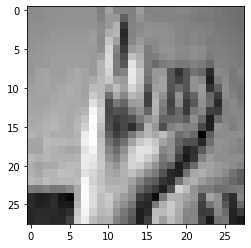

Label: 8


In [ ]:
train_features, train_labels = next(iter(dl_train))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# test if data is loaded correctly
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# **Train function**

In [ ]:
def train(args, model, device, train_loader, optimizer, epoch, loss_fn):
    trn_loss = 0.0    
    correct = 0


    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
      # print(f'batch_idx: {batch_idx}, data: {data}, target: {target}')
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        trn_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)          
        correct += pred.eq(target.view_as(pred)).sum().item()

    print(f'Epoch {epoch}: Train loss: {trn_loss/len(dl_train):8.5f}, Train acc: {100*correct/len(dl_train.dataset):6.2f}%')
    return trn_loss/len(dl_train)


# **Valid function**

In [ ]:
def valid(args, model, device, dl_val, loss_fn):  
  val_loss = 0.0
  val_correct = 0

  model.eval()
  val_correct = 0
  with torch.no_grad():
    for data, target in dl_val:
        data, target = data.to(device), target.to(device)

        output = model(data)                    
        loss = loss_fn(output, target)

        val_loss += loss.item()

        pred = output.argmax(dim=1, keepdim=True)  
        val_correct += pred.eq(target.view_as(pred)).sum().item()
        
    print(f'\t Valid loss: {val_loss/len(dl_val):8.5f}, Valid acc: {100*val_correct/len(dl_val.dataset):6.2f}%')
    return val_loss/len(dl_val)

# **Test function**

In [ ]:
def test(model, device, dl_test, loss_fn):
  model.eval()
  test_correct = 0
  for data, target in dl_test:
      data, target = data.to(device), target.to(device)
      # output = nn.functional.one_hot(target, num_classes=24).float()  

      output = model(data)                        
      pred = output.argmax(dim=1, keepdim=True)  
      # print(test_correct_matrix)
      test_correct += pred.eq(target.view_as(pred)).sum().item() 
      test_correct_matrix.append(pred.squeeze().tolist())
      test_truth_matrix.append(target.squeeze().tolist())


  print(f'\t Test acc: {100*test_correct/len(dl_test.dataset):6.2f}%')  

# **Main function**

Epoch 1: Train loss:  2.55199, Train acc:  24.87%
	 Valid loss:  1.72324, Valid acc:  45.18%
Epoch 2: Train loss:  0.99319, Train acc:  65.88%
	 Valid loss:  0.66554, Valid acc:  74.36%
Epoch 3: Train loss:  0.46446, Train acc:  83.84%
	 Valid loss:  0.18897, Valid acc:  94.12%
Epoch 4: Train loss:  0.21465, Train acc:  92.66%
	 Valid loss:  0.08182, Valid acc:  97.65%
Epoch 5: Train loss:  0.11558, Train acc:  96.19%
	 Valid loss:  0.02638, Valid acc:  99.76%
Epoch 6: Train loss:  0.07127, Train acc:  97.77%
	 Valid loss:  0.00963, Valid acc:  99.93%
Epoch 7: Train loss:  0.03993, Train acc:  98.80%
	 Valid loss:  0.00610, Valid acc:  99.89%
Epoch 8: Train loss:  0.03658, Train acc:  98.95%
	 Valid loss:  0.00277, Valid acc:  99.96%
Epoch 9: Train loss:  0.02651, Train acc:  99.23%
	 Valid loss:  0.00128, Valid acc:  99.98%
Epoch 10: Train loss:  0.01973, Train acc:  99.37%
	 Valid loss:  0.00225, Valid acc:  99.96%
Epoch 11: Train loss:  0.01822, Train acc:  99.43%
	 Valid loss:  0.0

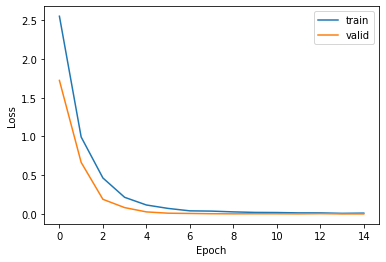

In [ ]:
use_cuda = not args['--no-cuda'] and torch.cuda.is_available()
use_mps = not args['--no-mps'] and torch.backends.mps.is_available()

# print(f'use_cuda: {use_cuda} , use_mps: {use_mps}')

if use_cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# print(device)

model = Net().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(model.parameters(), lr=args['--lr'])

tr_loss = []
vl_loss = []

for epoch in range(1, args['--epochs'] + 1):
    tr_loss.append(train(args, model, device, dl_train, optimizer, epoch, loss_fn))
    vl_loss.append(valid(args, model, device, dl_val, loss_fn))
    # test(model, device, dl_test, loss_fn)


plt.figure()
plt.plot(range(0,len(tr_loss)),tr_loss, label = "train")
plt.plot(range(0,len(vl_loss)),vl_loss, label = "valid")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
    

# **Testing ploting graph**

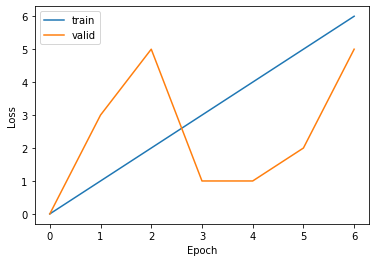

In [ ]:
tr_loss = [0,1,2,3,4,5,6]
vl_loss = [0,3,5,1,1,2,5]

plt.figure()
plt.plot(range(0,len(tr_loss)),tr_loss, label = "train")
plt.plot(range(0,len(vl_loss)),vl_loss, label = "valid")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Evaluate the trained model on test data**

	 Test acc:  95.13%


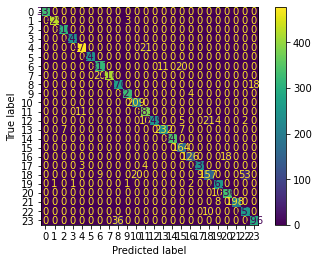

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_correct_matrix = []
test_truth_matrix  = []

test(model, device, dl_test, loss_fn)

disp = ConfusionMatrixDisplay(confusion_matrix(test_truth_matrix, test_correct_matrix))
disp.plot()
plt.show()


# **Find index of real test**
❌No need to run again

In [ ]:
numberTest = 7181
transform = torchvision.transforms.Compose([ 
                  torchvision.transforms.ToTensor(),
                  torchvision.transforms.Normalize((0.6246,), (0.1911,)),
                  torchvision.transforms.Grayscale(num_output_channels = 1)
])

ds_test  = torchvision.datasets.ImageFolder('/content/Test', transform = transform)
dl_test  = DataLoader(ds_test, batch_size= 1)

num = 0
indexs = []

dl_test_iterator = iter(dl_test)
for i in range(numberTest):
  data, target = next(dl_test_iterator)
  new_num = target[0]
  if num != new_num:
    indexs.append(i)
  elif i == numberTest - 1:
    indexs.append(i+1)
  num = new_num

i = 0

for n in indexs:
  if i + 65 < 74:
    print(f'i: {chr(i + 65)} \t => index: {n}')
  else:
    print(f'i: {chr(i + 65 + 1)} \t => index: {n}')
  i += 1

i: A 	 => index: 332
i: B 	 => index: 766
i: C 	 => index: 1076
i: D 	 => index: 1321
i: E 	 => index: 1819
i: F 	 => index: 2066
i: G 	 => index: 2414
i: H 	 => index: 2850
i: I 	 => index: 3138
i: K 	 => index: 3469
i: L 	 => index: 3679
i: M 	 => index: 4074
i: N 	 => index: 4365
i: O 	 => index: 4612
i: P 	 => index: 4959
i: Q 	 => index: 5123
i: R 	 => index: 5267
i: S 	 => index: 5513
i: T 	 => index: 5761
i: U 	 => index: 6028
i: V 	 => index: 6374
i: W 	 => index: 6580
i: X 	 => index: 6848
i: Y 	 => index: 7181


# **Test by case**

Feature batch shape: torch.Size([1, 1, 28, 28])
Labels batch shape: torch.Size([1])


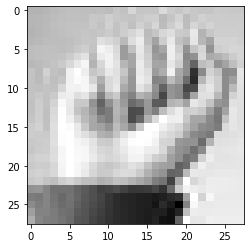

Label: 0


!!! Prediction Result !!!
    ♣ Prediction Label : 0
    ♦ Prediction Alphabet : A


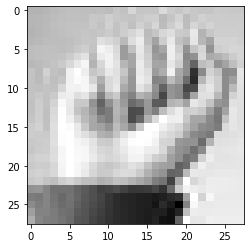

    ♠ Accuracy : 100.00%


In [ ]:
numberTest = 10
transform = torchvision.transforms.Compose([ 
                  torchvision.transforms.ToTensor(),
                  torchvision.transforms.Normalize((0.6246,), (0.1911,)),
                  torchvision.transforms.Grayscale(num_output_channels = 1)
])

ds_test  = torchvision.datasets.ImageFolder('/content/Test', transform = transform)
dl_test  = DataLoader(ds_test, batch_size= 1)



dl_test_iterator = iter(dl_test)
for i in range(numberTest):
  data, target = next(dl_test_iterator)

print(f"Feature batch shape: {data.size()}")
print(f"Labels batch shape: {target.size()}")

img = data[0].squeeze()
label = target[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# test process
model.eval()
test_correct = 0

data, target = data.to(device), target.to(device)
output = model(data)                    
predictionResults = output.argmax(dim=1, keepdim=True) 

prepareResults = target.view_as(predictionResults)
# print(pred)
predictionLabel = predictionResults[0].item()
test_correct = predictionResults.eq(prepareResults).sum().item() 


print('')
print('')
print('!!! Prediction Result !!!')
print(f'    ♣ Prediction Label : {predictionLabel}')
if predictionLabel + 65 < 74:
  print(f'    ♦ Prediction Alphabet : {chr(predictionLabel + 65)}')
else:
  print(f'    ♦ Prediction Alphabet : {chr(predictionLabel + 65 + 1)}')


iter_result = iter(dl_test)
index = -1
if(predictionLabel == 0):
  index = 10
elif(predictionLabel == 1):
  index = 756
elif(predictionLabel == 2):
  index = 1066
elif(predictionLabel == 3):
  index = 1311
elif(predictionLabel == 4):
  index = 1809
elif(predictionLabel == 5):
  index = 2056
elif(predictionLabel == 6):
  index = 2404
elif(predictionLabel == 7):
  index = 2840
elif(predictionLabel == 8):
  index = 3128
elif(predictionLabel == 9):
  index = 3459
elif(predictionLabel == 10):
  index = 3669
elif(predictionLabel == 11):
  index = 4064
elif(predictionLabel == 12):
  index = 4355
elif(predictionLabel == 13):
  index = 4602
elif(predictionLabel == 14):
  index = 4949
elif(predictionLabel == 15):
  index = 5113
elif(predictionLabel == 16):
  index = 5257
elif(predictionLabel == 17):
  index = 5503
elif(predictionLabel == 18):
  index = 5751
elif(predictionLabel == 19):
  index = 6018
elif(predictionLabel == 20):
  index = 6364
elif(predictionLabel == 21):
  index = 6570
elif(predictionLabel == 22):
  index = 6838
elif(predictionLabel == 23):
  index = 7171


for i in range(index):
  data_r, target_r = next(iter_result)
img_result = data_r[0].squeeze()
label = target[0]
plt.imshow(img_result, cmap="gray")
plt.show()

print(f'    ♠ Accuracy : {100*test_correct/len(data):6.2f}%')

# **Reference**
-> for main project
- https://github.com/pytorch/examples/blob/main/mnist/main.py
- https://colab.research.google.com/drive/10W_e4U7nmN9ON4MsivRFIeHv67tH6wBL?usp=sharing&fbclid=IwAR26vlAGxuaVOXv6NfG3Aln4j-HPnHkOLzk1878rHESGd4pJtQMdI8A_sOw#scrollTo=jt_qnYd1ZO_i
- https://deeplizard.com/learn/video/mUueSPmcOBc

-> for subsections
- https://github.com/pytorch/pytorch/issues/1917
-https://discuss.pytorch.org/tloaded-grayscale-image-is-converted-into-3-channel/75862/7
-https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder
- https://stackoverflow.com/questions/52265978/how-to-delete-a-locally-uploaded-file-on-google-colab
- https://stackoverflow.com/questions/68229246/pytorch-torchvision-datasets-imagefolder-filenotfounderror-found-no-valid-file/70676850#70676850

# **สมาชิกในกลุ่ม**
- นายคมสัน ทรวงแก้ว ุ630610720
- นายเทวฤทธิ์ สมฤทธิ์ 630610731
- นายนัฐพงษ์ บุญสละ 630610744